In [11]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame
data = {
    'params.concept_set': ['all_concepts'] * 6,
    'params.cfg_id': ['cc306ac3-95cb-404e-8b62-4947aa29125c'] * 6,
    'metrics.best_val_balanced_accuracy': [0.697689, 0.667227, 0.680252, 0.709454, 0.667647, 0.679412],
    'metrics.test_best_val_balanced_accuracy_balanced_accuracy': [0.639817, 0.583736, 0.566844, 0.633977, 0.581129, 0.573600]
}
metric = "metrics.best_val_balanced_accuracy"
metric2 = 'metrics.test_best_val_balanced_accuracy_balanced_accuracy'
df2 = pd.DataFrame(data)

In [12]:

median_order = df2.groupby(["params.concept_set", "params.cfg_id"])[metric].median().sort_values().index

In [35]:
len(median_order)

1

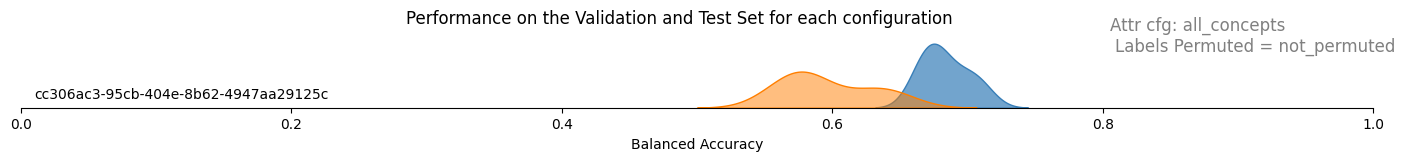

In [36]:
g = sns.FacetGrid(
    df2,
    row="params.cfg_id",
    hue="params.cfg_id",
    aspect=9,
    height=1.6,
    xlim=(0, 1),
    row_order= median_order if len(median_order) > 1 else None,
)

# Map Kernel Density Plot for each configuration
g.map_dataframe(sns.kdeplot, x=metric, color="#377eb8", fill=True, alpha=0.7)

# Map Kernel Density Plot for the second metric
g.map_dataframe(sns.kdeplot, x=metric2, color='#ff7f00', fill=True, alpha=0.5)

# Function to draw labels
def label(x, color, label):
    ax = plt.gca()  # Get current axis
    ax.text(
        0.01,
        0.2,
        label,
        color="black",
        fontsize=10,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )

# Iterate grid to plot labels
g.map(label, "params.cfg_id")

# Adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-0.5)

# Remove subplot titles
g.set_titles("")

# Remove y-axis ticks and label, set x-axis label
g.set(yticks=[], ylabel="", xlabel="Balanced Accuracy")

# Remove left spine
g.despine(left=True)

# Set title
plt.suptitle(
    "Performance on the Validation and Test Set for each configuration", y=0.98
)

plt.figtext(
    0.86,
    0.88,
    f"Attr cfg: all_concepts",
    ha="center",
    va="center",
    fontsize=12,
    color="gray",
)
plt.figtext(
    0.9,
    0.75,
    f"Labels Permuted = not_permuted",
    ha="center",
    va="center",
    fontsize=12,
    color="gray",
)

plt.show()